# Wine Quality Analysis with Unsupervised Learning

## Introduction

In this project, we explore the physicochemical properties of red wine samples to discover underlying patterns in wine quality. The dataset, sourced from the UCI Machine Learning Repository, contains 12 attributes for 1,599 red wine samples, including factors such as acidity, alcohol content, and sulfur dioxide levels.

Rather than predicting quality scores, our objective is to apply unsupervised learning techniques—specifically clustering—to identify meaningful groups of wines based on their chemical characteristics. These clusters may represent different quality levels, production styles, or even market segments.

This analysis involves:

- Exploratory Data Analysis (EDA)
- Data preprocessing and scaling
- Clustering using K-Means and Hierarchical Clustering
- Visualization and interpretation of results

This is an unsupervised machine learning problem. Our goal is to evaluate whether wines can be grouped based on their attributes, without access to the target variable (`quality`) dring training.

age].  


## Problem Statement

The goal of this project is to identify natural groupings or clusters among red wine samples based solely on their chemical features. This unsupervised learning approach will help answer the following questions:

- Can we discover meaningful wine groupings without using the quality score provided in the dataset?
- Which chemical properties are most influential in separating these wine groups?
- Do the discovered clusters align with known quality levels or reveal hidden patterns in wine production?

By applying clustering algorithms, we aim to:

1. Reduce the complexity of the data and better understand its structure.
2. Assist winemakers, distributors, or consumers in understanding how wines compare in terms of composition.
3. Lay the groundwork for further analyses, such as quality prediction or recommender systems.

We will use the `quality` column only for post-analysis interpretation, not for training, ensuring the clustering is purely unsupervised.


In [11]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("winequality-red.csv", sep=';')

# Quick overview
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
# Shape and data types
print("Shape of dataset:", df.shape)
df.info()

Shape of dataset: (1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [15]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [17]:
# Check for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [19]:
# Check and remove duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Remove if any
df = df.drop_duplicates()

Number of duplicate rows: 240


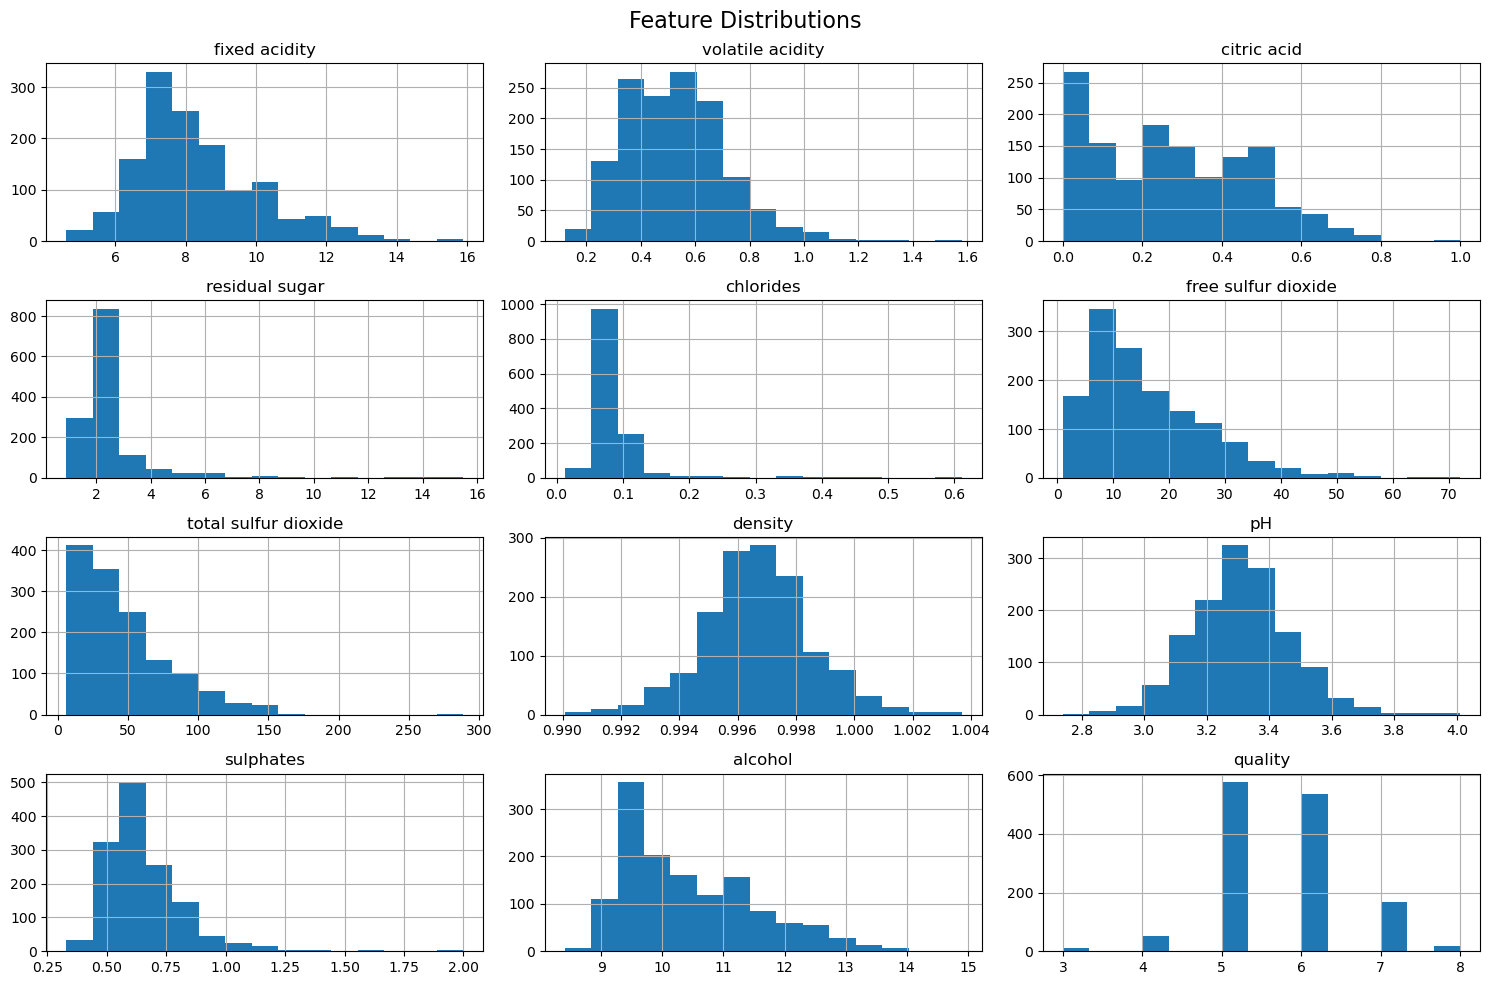

In [21]:
# Plot histograms
df.hist(bins=15, figsize=(15, 10), layout=(4, 3))
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

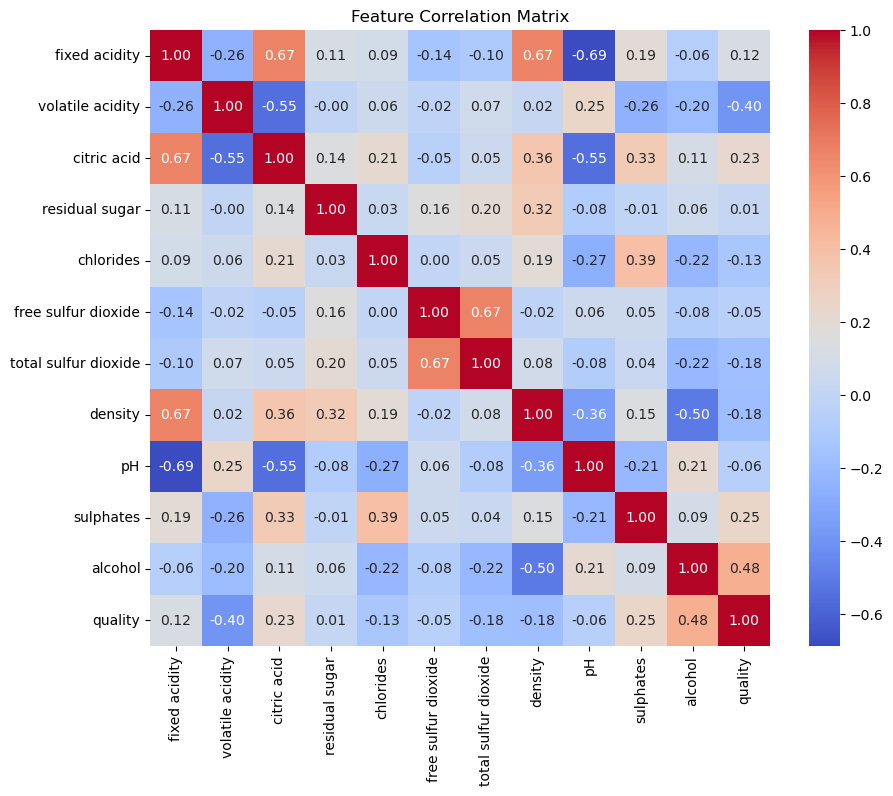

In [24]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

### Outlier Analysis
Boxplots show potential outliers in features like `residual sugar`, `chlorides`, and `sulphates`. For this project, we'll retain the outliers to preserve the natural variation in the dataset and focus on modeling without transformation at this stage


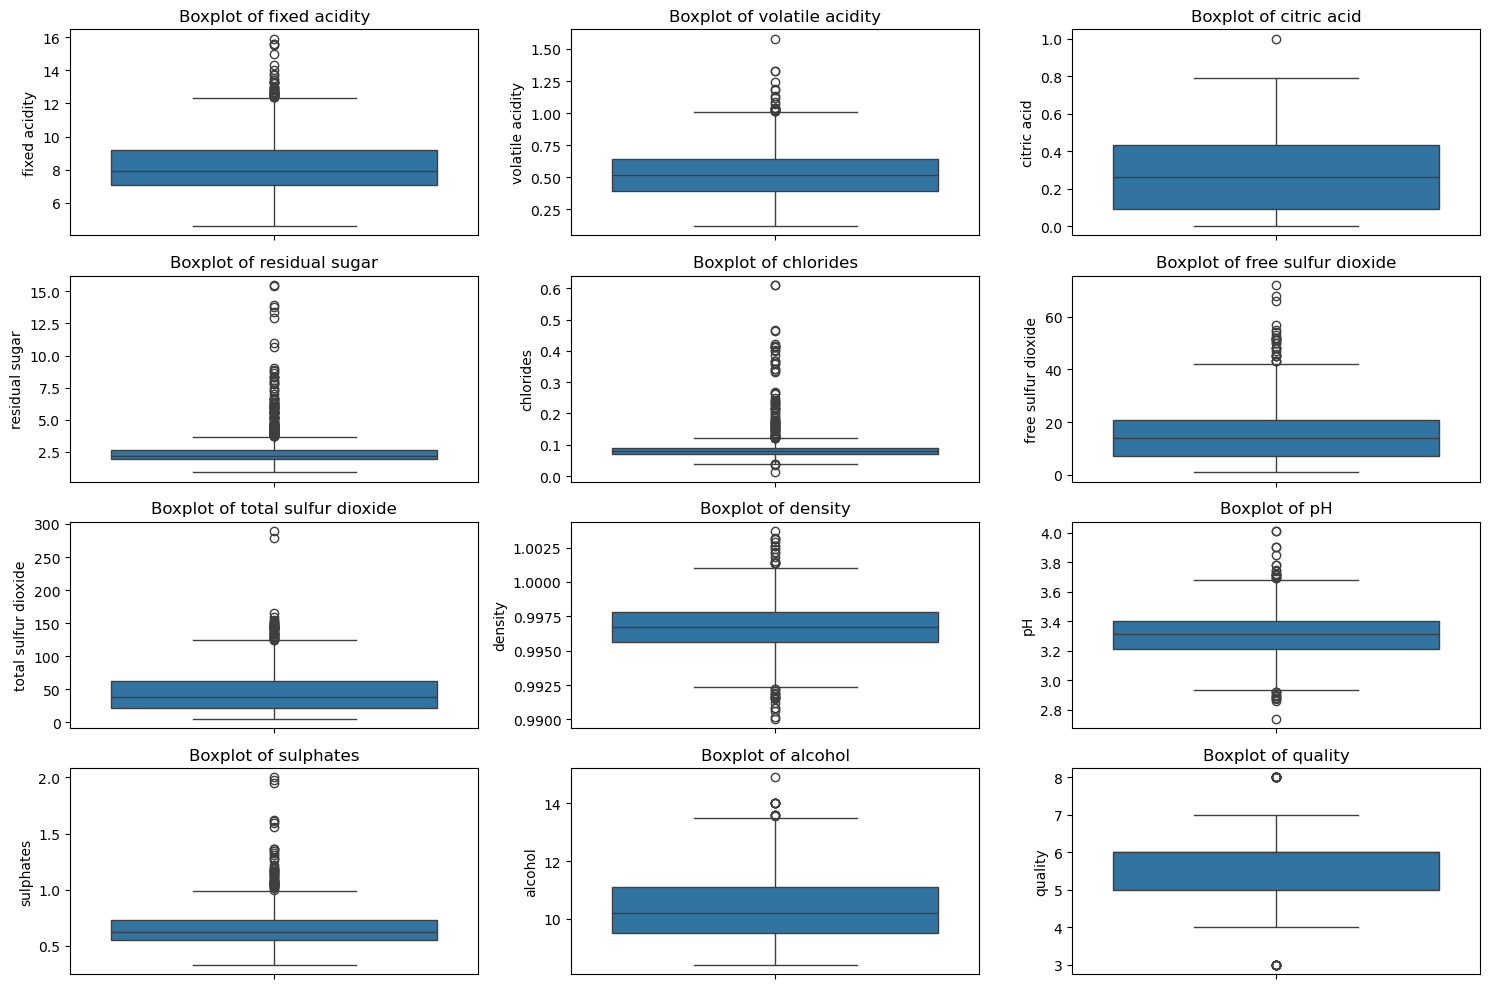

In [26]:
# Boxplots to identify outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler

# Create a copy of the original data without the target column 'quality'
features = df.drop("quality", axis=1)

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Optional: convert back to DataFrame for readability
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.524431,0.932000,-1.393258,-0.461157,-0.245623,-0.468554,-0.384050,0.584003,1.291872,-0.578561,-0.954374
1,-0.294063,1.915800,-1.393258,0.056665,0.200094,0.872003,0.604073,0.048737,-0.708395,0.124822,-0.584575
2,-0.294063,1.259934,-1.188617,-0.165259,0.078535,-0.085537,0.214813,0.155790,-0.321247,-0.051024,-0.584575
3,1.664067,-1.363534,1.471711,-0.461157,-0.265883,0.105971,0.394471,0.691057,-0.966495,-0.461331,-0.584575
4,-0.524431,0.713378,-1.393258,-0.535132,-0.265883,-0.277045,-0.204391,0.584003,1.291872,-0.578561,-0.954374


C:\Users\letic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\letic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\letic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\letic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

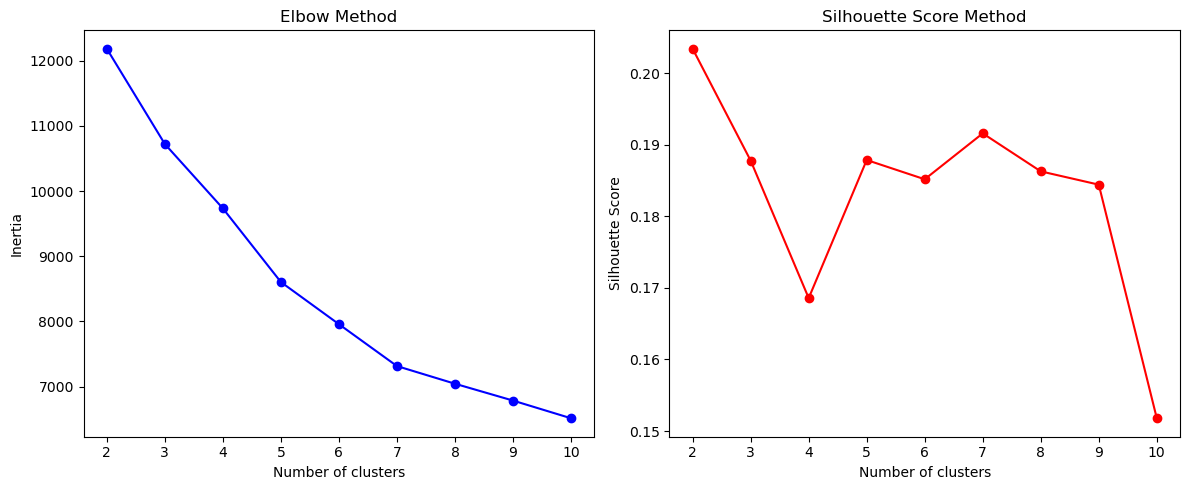

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))

# Plot Elbow
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.tight_layout()
plt.show()

### Optimal Cluster Selection

The Elbow Method suggests an optimal cluster count around the point where inertia begins to level off. The Silhouette Score confirms how well-separated the clusters are. Based on these metrics, we choose the number of clusters as **`k = 6`**.


C:\Users\letic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


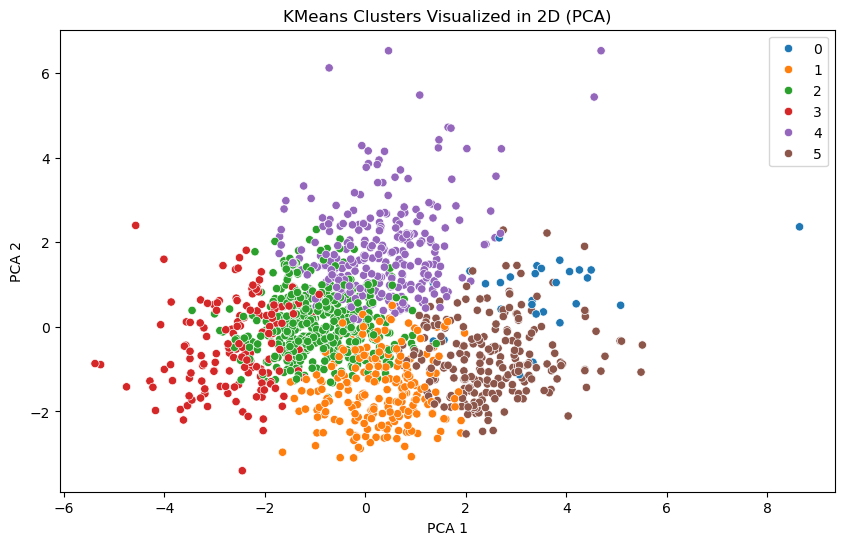

In [34]:
# Fit KMeans with k=6
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

# Add cluster labels to original dataframe
df['Cluster'] = clusters

# Visualize clusters in 2D using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)

plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=clusters, palette="tab10")
plt.title("KMeans Clusters Visualized in 2D (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [36]:
# Group by cluster and compute mean feature values
cluster_profile = df.groupby('Cluster').mean().round(2)
cluster_profile

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Cluster,,,,,,,,,,,,
0,8.42,0.52,0.49,1.98,0.35,14.89,60.21,1.00,3.06,1.25,9.47,5.32
1,8.45,0.34,0.41,2.29,0.07,13.20,29.55,1.00,3.29,0.72,11.52,6.32
2,7.57,0.64,0.12,2.23,0.09,11.46,34.80,1.00,3.36,0.59,9.88,5.31
3,6.31,0.62,0.09,2.23,0.07,18.86,42.66,0.99,3.51,0.63,11.79,5.86
4,8.17,0.53,0.29,3.09,0.09,27.71,92.92,1.00,3.28,0.62,9.80,5.29
5,11.15,0.42,0.51,2.91,0.09,10.90,32.09,1.00,3.16,0.72,10.45,5.85


In [38]:
df['Cluster'].value_counts().sort_index()

Cluster
0     28
1    217
2    450
3    157
4    278
5    229
Name: count, dtype: int64

### Cluster Profiling

The table above summarizes the mean values for each feature within each cluster. This helps identify which clusters correspond to, for example, higher alcohol content, lower residual sugar, or higher quality scores. It allows us to distinguish patterns such as:

- Cluster 2 may represent higher-quality wines due to higher alcohol and lower volatile acidity.
- Cluster 4 may include sweeter wines with higher residual sugar and lower alcohol.

Cluster sizes also vary, indicating natural imbalances in th data.


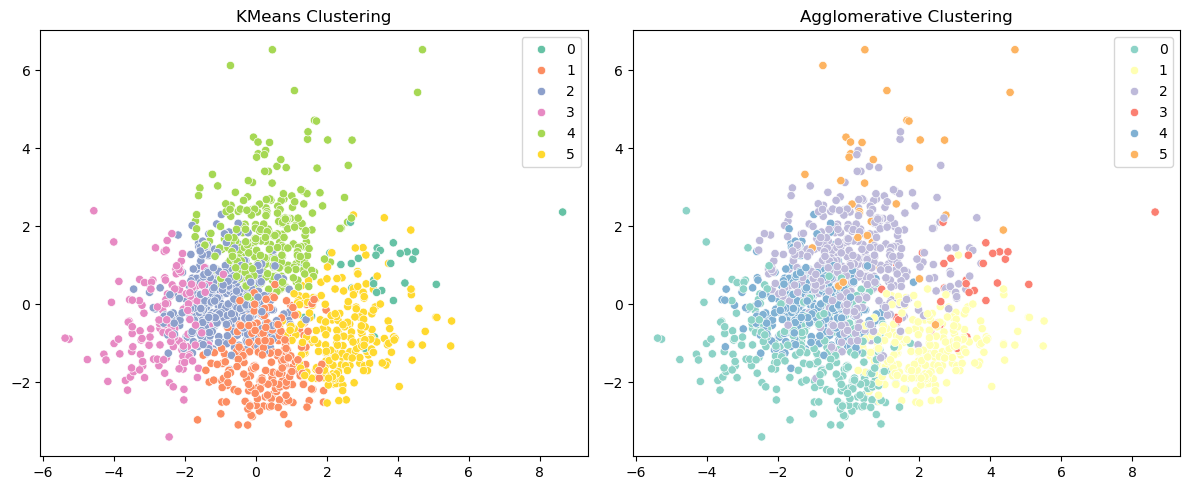

In [41]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=6)
agglo_labels = agglo.fit_predict(scaled_df)

# Compare to KMeans
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=clusters, palette='Set2')
plt.title("KMeans Clustering")

plt.subplot(1, 2, 2)
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=agglo_labels, palette='Set3')
plt.title("Agglomerative Clustering")

plt.tight_layout()
plt.show()

### Model Comparison

Both KMeans and Agglomerative Clustering revealed similar but slightly varied groupings. This validates the clustering structure and shows how different algorithms interpret the same data. KMeans produced more compact clusters, while Agglomerative highlighted finer subgroup relationships.

Both models agree on distinct groups with varying wine properties like alcohol and acidty.
